In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [427]:
df = pd.read_excel('https://github.com/ShinyQ/Tugas-Pengantar-AI-3_KNN/blob/main/mobil.xls?raw=true')
df.sample(8)

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
10,Honda City,5,8,7,8,2.70
11,Toyota Hiace,10,5,8,6,5.00
3,Daihatsu Xenia,6,4,6,6,1.75
9,Toyota Vios,5,7,9,8,2.50
15,Suzuki Ertiga,7,7,7,7,2.30
14,Toyota Corolla Altis,5,9,7,9,6.00
12,Toyota Fortuner,9,8,5,8,5.00
1,Daihatsu Alya,4,3,9,6,1.10


In [428]:
data = df.rename({'Harga (Ratus Juta)': 'Harga'}, axis=1)
data = data.drop('Nama Mobil', axis=1)

In [429]:
data.isna().sum()

Ukuran        0
Kenyamanan    0
Irit          0
Kecepatan     0
Harga         0
dtype: int64

In [430]:
data.describe(include='all')

,Ukuran,Kenyamanan,Irit,Kecepatan,Harga
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,6.529412,6.352941,6.941176,6.823529,3.247059
std,2.034627,2.234423,1.784327,1.131111,2.406597
min,3.000000,3.000000,4.000000,5.000000,0.800000
25%,5.000000,4.000000,6.000000,6.000000,1.750000
50%,7.000000,7.000000,7.000000,7.000000,2.300000
75%,8.000000,8.000000,9.000000,8.000000,5.000000
max,10.000000,10.000000,10.000000,9.000000,10.000000


### **Data Preprocessing**

##### **Min Max Feature Scaling**

In [431]:
for col in range(len(data)):
    data['Harga'][col] = (data['Harga'][col] - (data['Harga']).min()) / ((data['Harga']).max() - (data['Harga']).min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### **Exploratory Data Analysis**

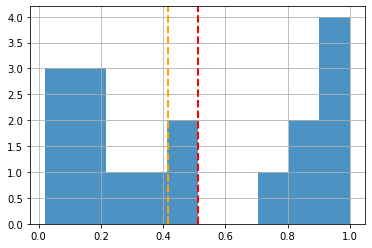

In [432]:
data['Harga'].hist(alpha=0.8)
plt.axvline(data['Harga'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Harga'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')

### **Modelling**

In [433]:
def euclidean_distance(x, y):
    dist = 0
    for i in range(len(y)):
        dist += (x[i] - y[i])**2

    return math.sqrt(dist)

def manhattan_distance(x, y):
    dist = 0

    for i in range(len(x)):
        dist += abs(float(x[i]) - float(y[i]))

    return dist

 
def minkowski_distance(x,y, p=2):
    dist = 0

    for i in range(len(x)):
        dist += (float(x[i]) - float(y[i]))**p

    return dist


def supremum_distance(x, y):
    dist = []

    for i in range(len(x)):
        dist.append(abs(float(x[i]) - float(y[i])))

    return max(dist)

In [434]:
def get_disance(x, y, k):
    euclidean, manhattan, minkowski, supremum = [], [], [], []

    for i in range(len(x)):
        minkowski.append([minkowski_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])
        manhattan.append([manhattan_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])
        euclidean.append([euclidean_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])
        supremum.append([supremum_distance(x.iloc[i].tolist(), y), df['Nama Mobil'][i]])

    euclidean = sorted(euclidean[:k])
    manhattan = sorted(manhattan[:k])
    minkowski = sorted(minkowski[:k])
    supremum = sorted(supremum[:k])

    return euclidean, manhattan, minkowski, supremum

In [435]:
def knn(x, y, k=3):
    euclidean, manhattan, minkowski, supremum = get_disance(x, y, k)
    distances = [['Euclidean', euclidean], ['Manhattan', manhattan], ['Minkowski', minkowski], ['Supremum', supremum]]

    return distances

### **Result**

In [436]:
ukuran = float(input("Masukkan Ukuran: "))
kenyamanan = float(input("Masukkan Kenyamanan: "))
irit = float(input("Masukkan Irit: "))
kecepatan = float(input("Masukkan Kecepatan: "))
harga = float(input("Harga: "))


distances = knn(data, [ukuran, kenyamanan, irit, kecepatan, harga])

for method in distances:
      print(f'\nMetode: {method[0]}')
      car = []

      for i, distance in enumerate(method[1]):
          print(f'{i+1}. {distance[1]}, Distance: {distance[0]}')
          car.append(distance[1])
      
      car = pd.DataFrame(car)
      car.to_excel(f'{method[0]}.xls', index=False, header=False)  

Masukkan Ukuran: 1
Masukkan Kenyamanan: 2
Masukkan Irit: 3
Masukkan Kecepatan: 4
Harga: 5

Metode: Euclidean
1. Toyota Avanza, Distance: 8.369990147181285
2. Daihatsu Alya, Distance: 8.598317693502919
3. Toyota Agya, Distance: 8.819471712378482

Metode: Manhattan
1. Daihatsu Alya, Distance: 16.89193899782135
2. Toyota Avanza, Distance: 17.80174291938998
3. Toyota Agya, Distance: 17.97826086956522

Metode: Minkowski
1. Toyota Avanza, Distance: 70.05673506391179
2. Daihatsu Alya, Distance: 73.93106715840536
3. Toyota Agya, Distance: 77.78308128544424

Metode: Supremum
1. Toyota Avanza, Distance: 5.0
2. Daihatsu Alya, Distance: 6.0
3. Toyota Agya, Distance: 6.0
